#Imports y descripcion

* Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Colab Notebooks/CienciaDeDatos/01_ML/FuelConsumption.csv"

* Descripcion

Vamos a tener como y, la emision de Co2, como x, el tamano del motor

In [2]:
df = pd.read_csv(path)

* Split target y patron

In [3]:
y = df['CO2EMISSIONS']
print(len(y))
x = df[['ENGINESIZE']]
print(len(x))

1067
1067


# Explorar, EDA

scatter

### Estadistica descriptiva

###

In [4]:
# Explorar HIST

# Contruir el modelo

* Imports

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# diferencia entre y

### Baseline (Sim importar que entrada, predice lo mismo)

In [6]:
y_mean =y.mean()
y_mean

256.2286785379569

In [7]:
y_pred_baseline = [y_mean] * len(y)

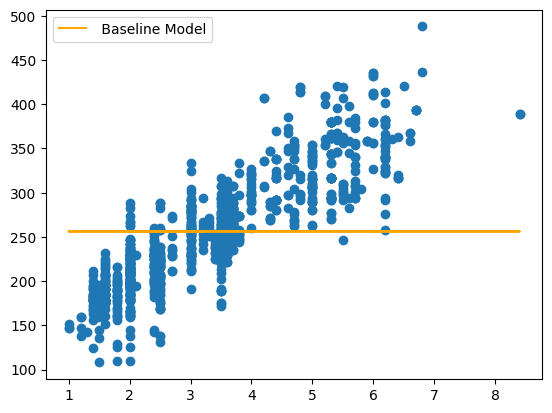

In [8]:
plt.plot(x.values, y_pred_baseline, color='orange', label = ' Baseline Model')
plt.scatter(x,y)
plt.xlabel = 'Engine Size'
plt.ylabel = 'Emission'
plt.title =' Emission vs Engine size'
plt.legend();

In [9]:
mae_baseline = mean_absolute_error(y, y_pred_baseline)
mae_baseline
#caulquier metrica mejor que esto, es bien

51.04539613470135

### Crear modelo

In [10]:
model = LinearRegression()

### Entrenar el modelo

In [11]:
model.fit(x,y)

LinearRegression()

### Prediccion

In [12]:
y_pred_training = model.predict(x)
y_pred_training[:5]

array([203.55449907, 219.20457898, 183.99189918, 262.24229875,
       262.24229875])

### Evaluacion

In [13]:
mae_training = mean_absolute_error(y, y_pred_training)
print('Training MAE:', round(mae_training, 2))

Training MAE: 23.35


### Plot dispersion y la linea x

### Deployment

In [14]:
intercept = model.intercept_
print("Model intercept:", intercept)

Model intercept: 125.30409949535692


In [15]:
coefficient = model.coef_[0]
print("Model coeddicient for 'CO_2:", coefficient)

Model coeddicient for 'CO_2: 39.12519978671172


In [16]:
print(f"Emission = {intercept} + {coefficient} * Engin size")

Emission = 125.30409949535692 + 39.12519978671172 * Engin size


#Multiple linear regression

## Split entre target y patron

* Listo el ttal de columnas

In [17]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

* De las columndas separo

In [18]:
x = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB_MPG"]]
y = df["CO2EMISSIONS"]

In [19]:
import seaborn as sns

<ipython-input-20-30f7755427cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


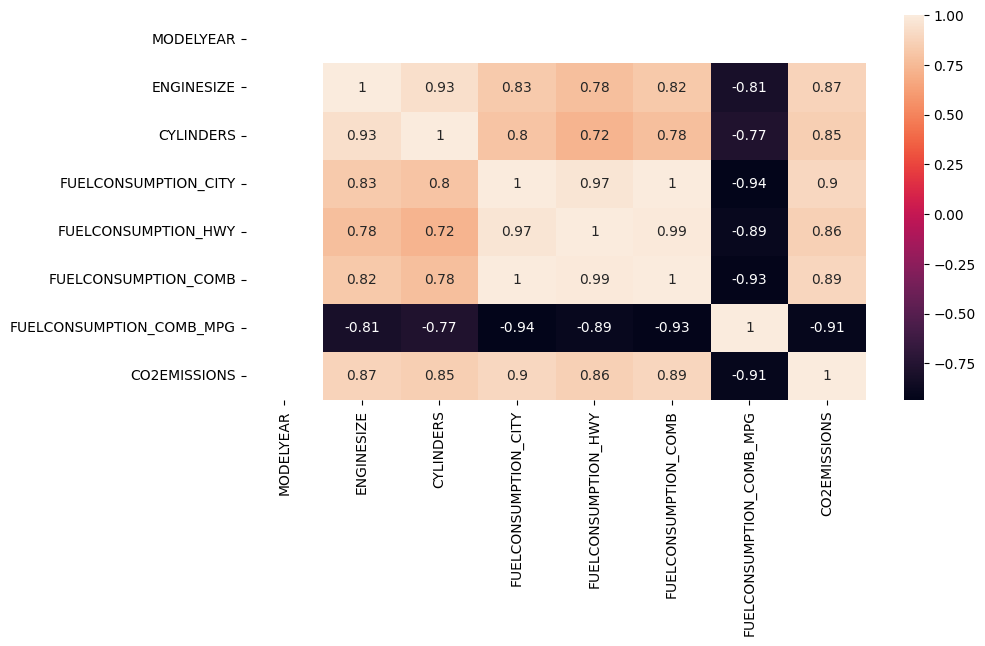

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

<ipython-input-21-a553ef46b5cd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrDF = pd.DataFrame(df.corr()['CO2EMISSIONS'].sort_values(ascending=True)).reset_index()


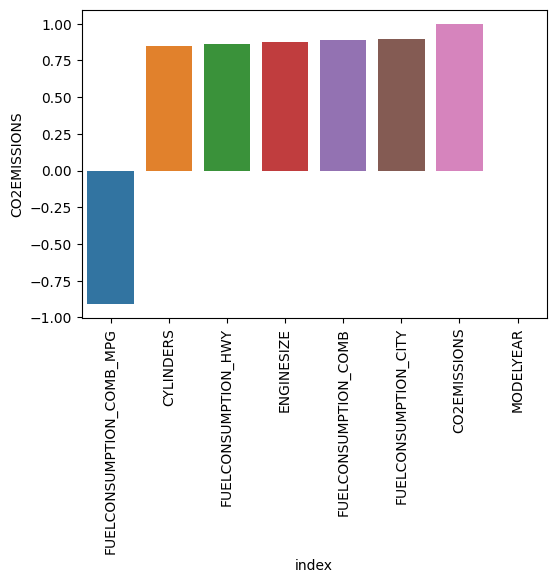

In [21]:
plt.figure(figsize=(6,4))
#plt.figure(figsize=(25,19))

corrDF = pd.DataFrame(df.corr()['CO2EMISSIONS'].sort_values(ascending=True)).reset_index()
corrSplot = sns.barplot(data= corrDF,x='index', y='CO2EMISSIONS')

#plt.bar_label(corrSplot.containers[0])
plt.xlabel='Feature'
plt.ylabel='Correlación'
plt.xticks(rotation=90)
plt.show()

In [22]:
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Split prueba y entrenamiento

* Imports

In [23]:
from sklearn.model_selection import train_test_split

* Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Entrenar el modelo

### Crer modelo/Instancia del modelo y entreno

* Instancio modelo

In [25]:
model = LinearRegression()

* Entreno

In [26]:
model.fit(x_train, y_train)

LinearRegression()

### Preiccion

In [27]:
y_pred_traning = model.predict(x_test)
y_pred_training[:5]

array([203.55449907, 219.20457898, 183.99189918, 262.24229875,
       262.24229875])

### Evaluacion

In [28]:
len(y_pred_traning)

214

In [29]:
mae_test = mean_absolute_error(y_test, y_pred_traning)
print('Training MAE:', round(mae_test, 2))

Training MAE: 13.64


### Comunicar resultados

* Intercepto

In [30]:
intercept = model.intercept_
print("Model Intercept:", intercept)

Model Intercept: 315.5201536475432


* Coeficiente

In [31]:
coefficient = model.coef_
print("Model coefficienter for CO_2:", coefficient)
# Entre los 3 descrpitores, en la prediccion de la emision de CO2, el tamano del motor tiene mayor peso

Model coefficienter for CO_2: [10.67587456  6.21246377 -4.95164102]


In [32]:
x.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG'], dtype='object')

In [33]:
print(f"Emission = {round(intercept,2)} + ")

Emission = 315.52 + 


# Despliegue

In [34]:
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [35]:
x_test.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG'], dtype='object')

* Creo funcion que hag alas predicciones

In [36]:
def make_predictions(eng, cyl, fuel):
    #le paso el barrio
    data = {
        "ENGINESIZE": eng,
        "CYLINDERS": cyl,
        "FUELCONSUMPTION_COMB_MPG": fuel

    }

    #lo paso a df
    df = pd.DataFrame(data, index =[0])

    #Predigo
    prediction = model.predict(df).round(2)[0]


    #imprimo resultados
    return f"Predictd CO2 emission: \t ${prediction}"

* Puebo con una predicción

In [37]:
#verifico quien voy a predecir
x_test.head(1)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG
732,4.7,8,21


In [38]:
#predigo
make_predictions(4.7,8,13.21)

'Predictd CO2 emission: \t $349.99'

In [39]:
#verifico con test cual sería el valor real
y_test.head(1)

732    304
Name: CO2EMISSIONS, dtype: int64

* Creamos widget

In [40]:
interact(
    #funcion a ejecutar con la data que recibe
    make_predictions,
    # variables, recibidas de sliders, le digo que por defecto reciba la medi
    eng = FloatSlider(min = x_test['ENGINESIZE'].min(), max= x_test['ENGINESIZE'].max(), step = 0.01, value = x_test['ENGINESIZE'].mean()),
    cyl = IntSlider(min = x_test['CYLINDERS'].min(), max= x_test['CYLINDERS'].max(), value = x_test['CYLINDERS'].mean()),
    fuel = FloatSlider(min = x_test['FUELCONSUMPTION_COMB_MPG'].min(), max= x_test['FUELCONSUMPTION_COMB_MPG'].max(), step = 0.01, value = x_test['FUELCONSUMPTION_COMB_MPG'].mean())
);

interactive(children=(FloatSlider(value=3.296728971962617, description='eng', max=8.4, min=1.0, step=0.01), In…

In [41]:
x_test.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG'], dtype='object')